## **CLEAN DATA**

### **LIBRERIAS Y DS**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as eda

from sklearn.model_selection import train_test_split


In [62]:
URL = '/workspaces/Jese-David-Proyecto-Regresion-Logistica/data/processed/early_ds.csv'
ds_early = pd.read_csv (URL)
target = 'y'

### **SPLIT**

In [63]:
X = ds_early.drop(columns=[target])
y = ds_early[target]

# Split ANTES de cualquier tratamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y         # muy recomendable en clasificación
)

print(X_train.shape, X_test.shape)

(32940, 20) (8236, 20)


### **OUTLIERS**

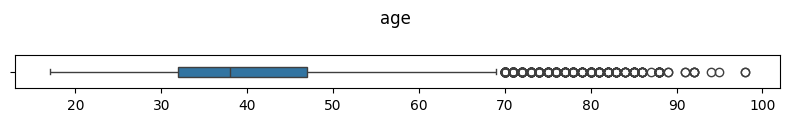

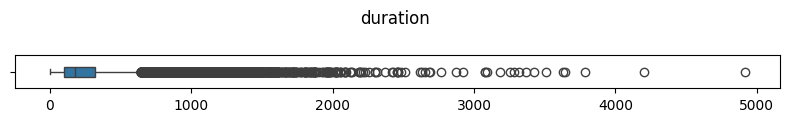

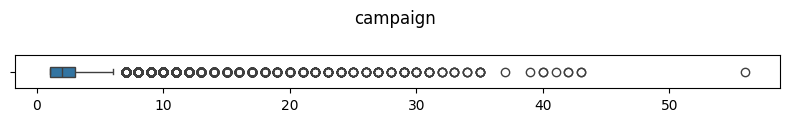

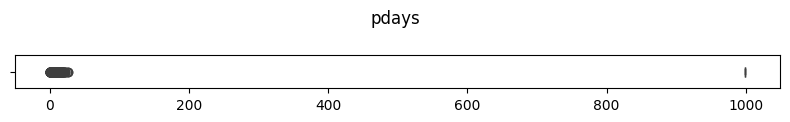

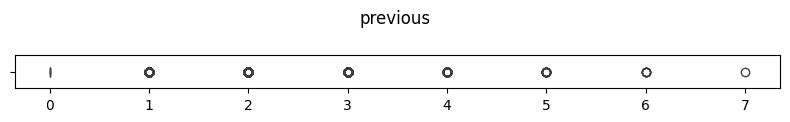

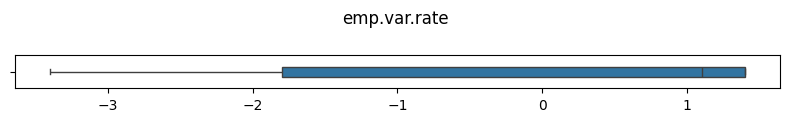

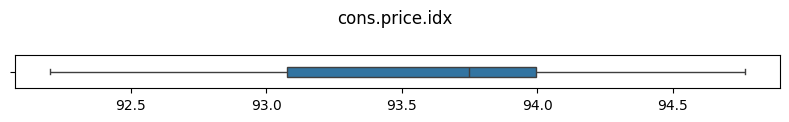

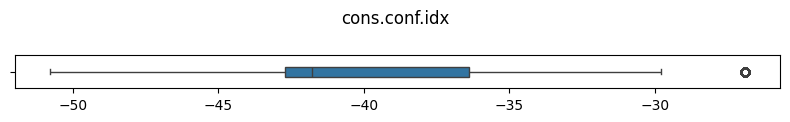

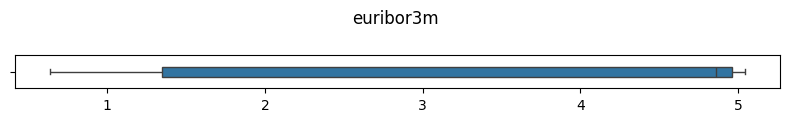

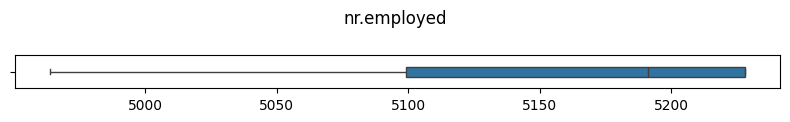

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [64]:
eda.outliers_analysis(ds_early,target)

#### **Limpieza**

In [65]:
cols_to_drop = ['duration']   # añade más si quieres

cols_to_drop = [c for c in cols_to_drop if c in X_train.columns]

X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)


In [ ]:
# columnas numéricas donde tiene sentido mirar outliers
num_cols = X_train.select_dtypes(include='number').columns.tolist()
print("Numéricas para outliers:", num_cols)

def cap_outliers_train_test(X_train, X_test, cols, factor=1.5):
    """
    Calcula límites IQR en train y capea train y test usando esos mismos límites.
    """
    Xtr = X_train.copy()
    Xte = X_test.copy()

    for col in cols:
        Q1 = Xtr[col].quantile(0.25)
        Q3 = Xtr[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        # cap en train
        Xtr[col] = np.where(Xtr[col] < lower, lower, Xtr[col])
        Xtr[col] = np.where(Xtr[col] > upper, upper, Xtr[col])

        # cap en test con LOS MISMOS límites
        Xte[col] = np.where(Xte[col] < lower, lower, Xte[col])
        Xte[col] = np.where(Xte[col] > upper, upper, Xte[col])

    return Xtr, Xte

X_train_clean, X_test_clean = cap_outliers_train_test(X_train, X_test, num_cols)


Numéricas para outliers: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [69]:
print("NaN values per column:")
ds_early.isna().sum()

NaN values per column:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### **Guardamos**

In [70]:
ds_early.to_csv('../data/processed/clean_ds.csv', index = False)